In [1]:
%matplotlib widget

In [2]:
import numpy as np
import h5py as h5
import matplotlib.pyplot as plt
import pathlib
import pandas
from pykern import pkyaml
from sirepo.template import madx_parser
from rsbeams.rsdata.SDDS import readSDDS
from scipy import constants

# Load Results 


## MADX

In [3]:
madx_particle_file = 'madx/ptc_track.file.tfsone'


In [4]:
mp = madx_parser.parse_tfs_file(
        madx_particle_file
    )
    

In [5]:
madx_particles = {}
for k, v in mp.items():
    madx_particles[k] = np.array(v, float)

In [6]:
madx_twiss_file = 'madx/twiss.file.tfs'

In [7]:
madx_twiss = madx_parser.parse_tfs_file(
        madx_twiss_file
    )

## elegant

In [8]:
elegant_particle_file = readSDDS('elegant/run_setup.output.sdds')
elegant_particle_file.read()
elegant_particles = elegant_particle_file.columns.squeeze()

elegant_sigma_file = readSDDS('elegant/run_setup.sigma.sdds')
elegant_sigma_file.read()
elegant_sigma = elegant_sigma_file.columns.squeeze()

elegant_twiss_file = readSDDS('elegant/twiss_output.filename.sdds')
elegant_twiss_file.read()
elegant_twiss = elegant_twiss_file.columns.squeeze()

# ImpactX

In [9]:
impactx_sigma = pandas.read_csv('impactx/diags/reduced_beam_characteristics.0.0', delimiter=' ')
impactx_particles = pandas.read_hdf('impactx/diags/final_distribution.h5')

# Plots

## Sigma

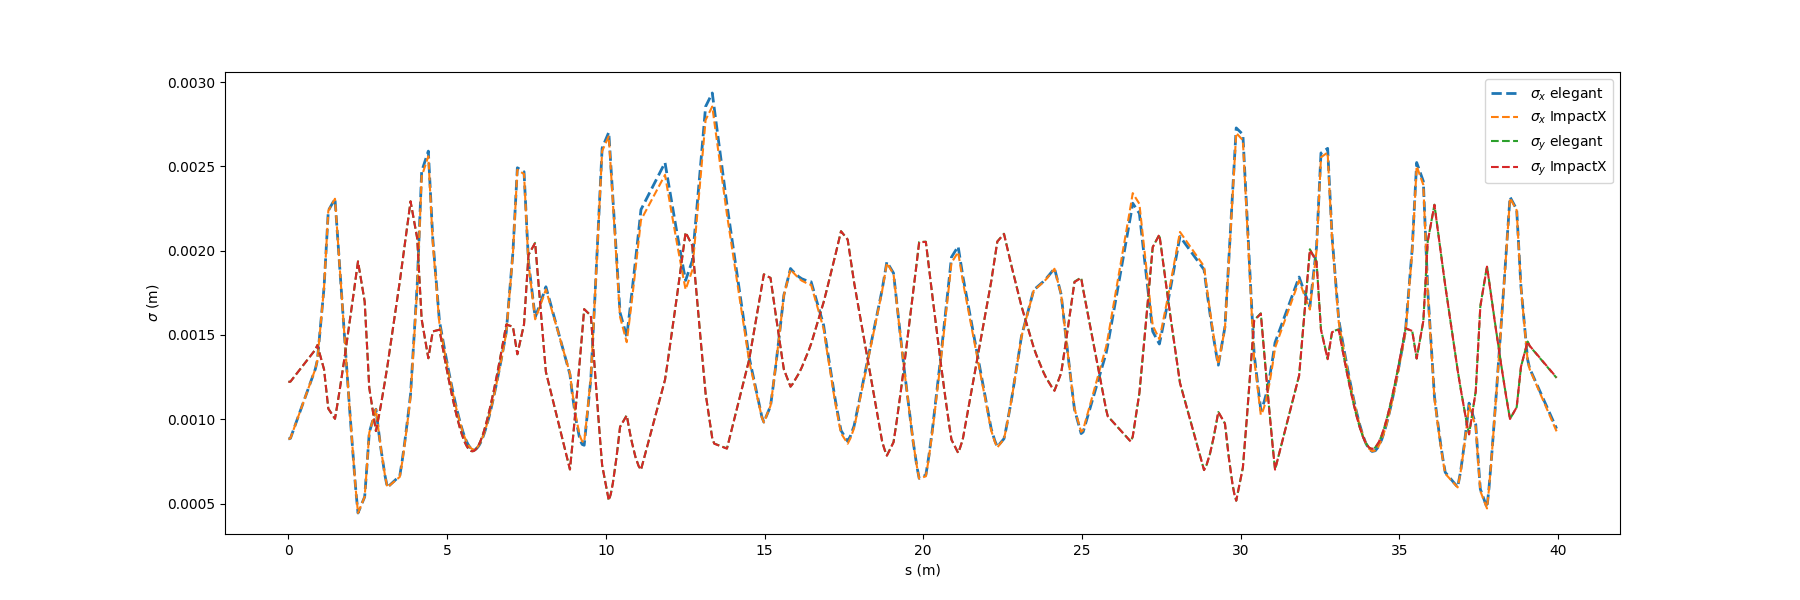

In [10]:
plt.figure(figsize=(18, 6))


plt.plot(elegant_sigma['s'], elegant_sigma['Sx'], '--', label=r'$\sigma_x$ elegant', linewidth=2)
plt.plot(impactx_sigma['s'].values, impactx_sigma['sig_x'].values, '--', label='$\sigma_x$ ImpactX')

plt.plot(elegant_sigma['s'], elegant_sigma['Sy'], '--', label=r'$\sigma_y$ elegant')
plt.plot(impactx_sigma['s'].values, impactx_sigma['sig_y'].values, '--', label='$\sigma_y$ ImpactX')

plt.xlabel('s (m)')
plt.ylabel(r'$\sigma$ (m)')
plt.legend()
plt.show()

## Twiss

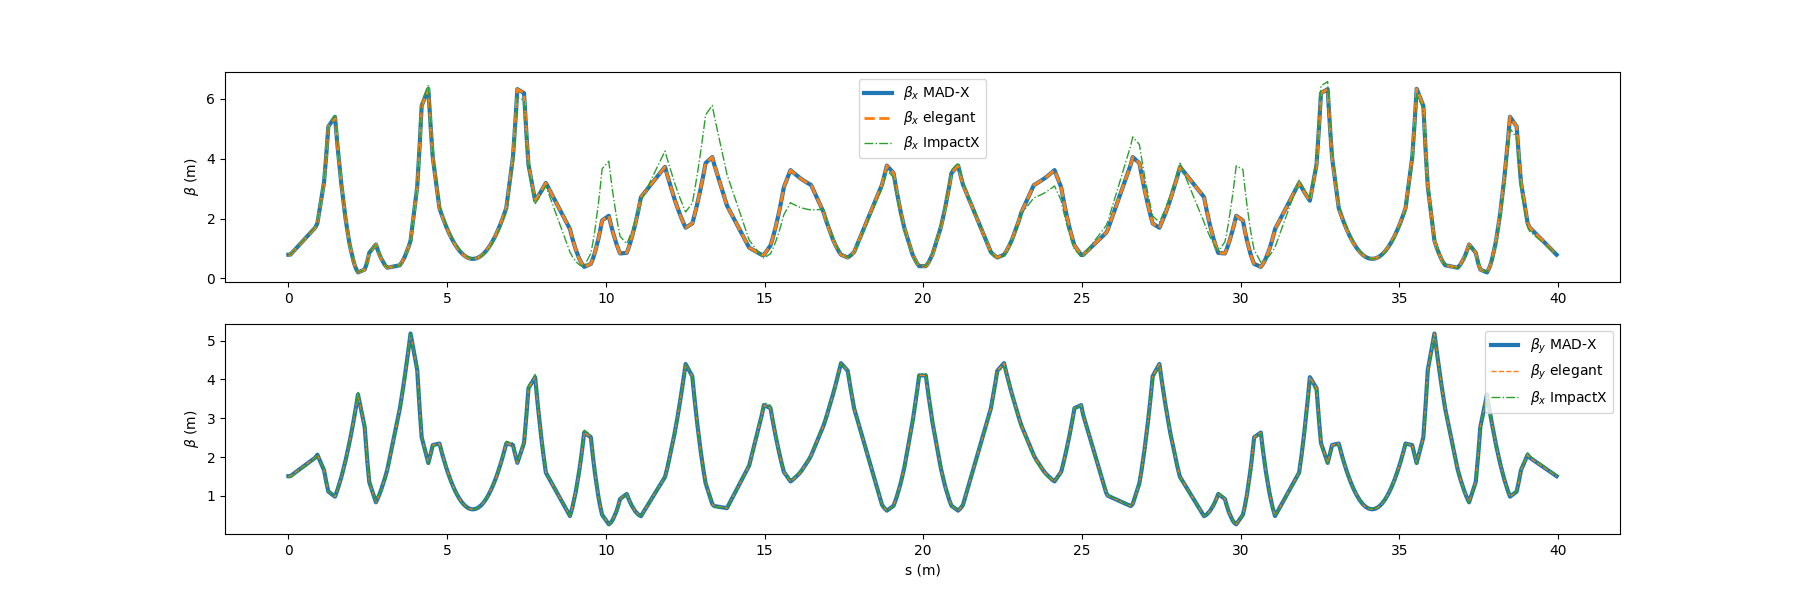

In [11]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(18, 6))

ax1.plot(np.array(madx_twiss['s'], float), np.array(madx_twiss['betx'], float), label=r'$\beta_x$ MAD-X', linewidth=3)
ax1.plot(elegant_twiss['s'], elegant_twiss['betax'], '--', label=r'$\beta_x$ elegant', linewidth=2)
ax1.plot(impactx_sigma['s'].values, (impactx_sigma['sig_x'].values**2 / impactx_sigma['emittance_x'].values), '-.', label=r'$\beta_x$ ImpactX', linewidth=1)

ax2.plot(np.array(madx_twiss['s'], float), np.array(madx_twiss['bety'], float), label=r'$\beta_y$ MAD-X', linewidth=3)
ax2.plot(elegant_twiss['s'], elegant_twiss['betay'], '--', label=r'$\beta_y$ elegant', linewidth=1)
ax2.plot(impactx_sigma['s'].values, (impactx_sigma['sig_y'].values**2 / impactx_sigma['emittance_y'].values), '-.', label=r'$\beta_x$ ImpactX', linewidth=1)

ax2.set_xlabel('s (m)')
for ax in (ax1, ax2):
    ax.set_ylabel(r'$\beta$ (m)')
    ax.legend()

plt.show()

## Tracking

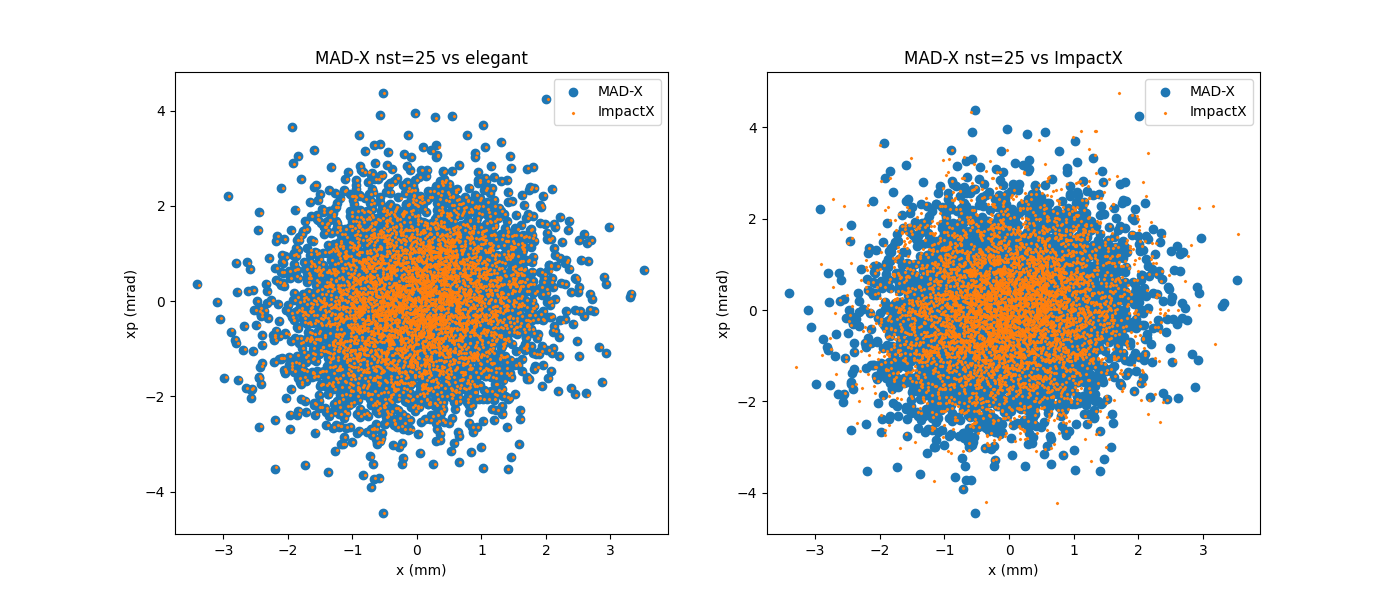

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

ax1.scatter(madx_particles['x'][5000:] * 1e3, madx_particles['px'][5000:] * 1e3, label='MAD-X')
ax1.scatter(elegant_particles['x'] * 1e3, elegant_particles['xp'] * 1e3, marker='x', s=2, label='ImpactX')
ax1.set_xlabel('x (mm)')
ax1.set_ylabel('xp (mrad)')
ax1.legend()
ax1.set_title('MAD-X nst=25 vs elegant')

ax2.scatter(madx_particles['x'][5000:] * 1e3, madx_particles['px'][5000:] * 1e3, label='MAD-X')
ax2.scatter(impactx_particles['position_x'] * 1e3, impactx_particles['momentum_x'] * 1e3, marker='x', s=2, label='ImpactX')
ax2.set_xlabel('x (mm)')
ax2.set_ylabel('xp (mrad)')
ax2.legend()
ax2.set_title('MAD-X nst=25 vs ImpactX')

plt.show()

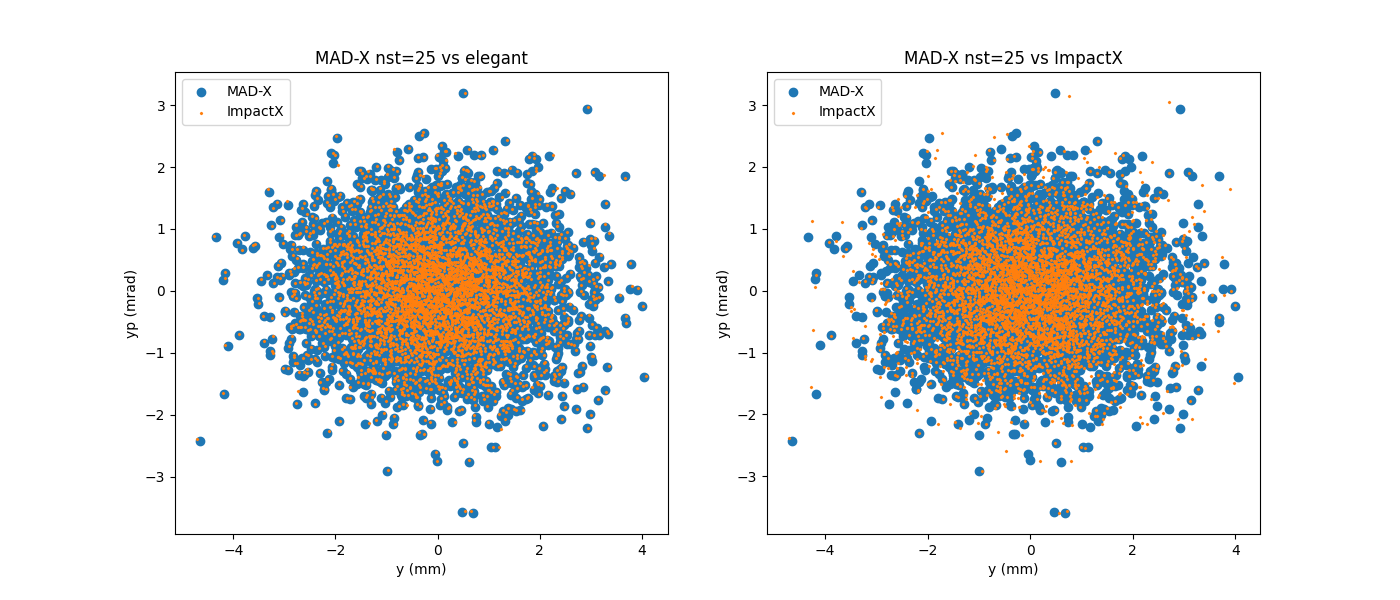

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

ax1.scatter(madx_particles['y'][5000:] * 1e3, madx_particles['py'][5000:] * 1e3, label='MAD-X')
ax1.scatter(elegant_particles['y'] * 1e3, elegant_particles['yp'] * 1e3, marker='x', s=2, label='ImpactX')
ax1.set_xlabel('y (mm)')
ax1.set_ylabel('yp (mrad)')
ax1.legend()
ax1.set_title('MAD-X nst=25 vs elegant')

ax2.scatter(madx_particles['y'][5000:] * 1e3, madx_particles['py'][5000:] * 1e3, label='MAD-X')
ax2.scatter(impactx_particles['position_y'] * 1e3, impactx_particles['momentum_y'] * 1e3, marker='x', s=2, label='ImpactX')
ax2.set_xlabel('y (mm)')
ax2.set_ylabel('yp (mrad)')
ax2.legend()
ax2.set_title('MAD-X nst=25 vs ImpactX')

plt.show()

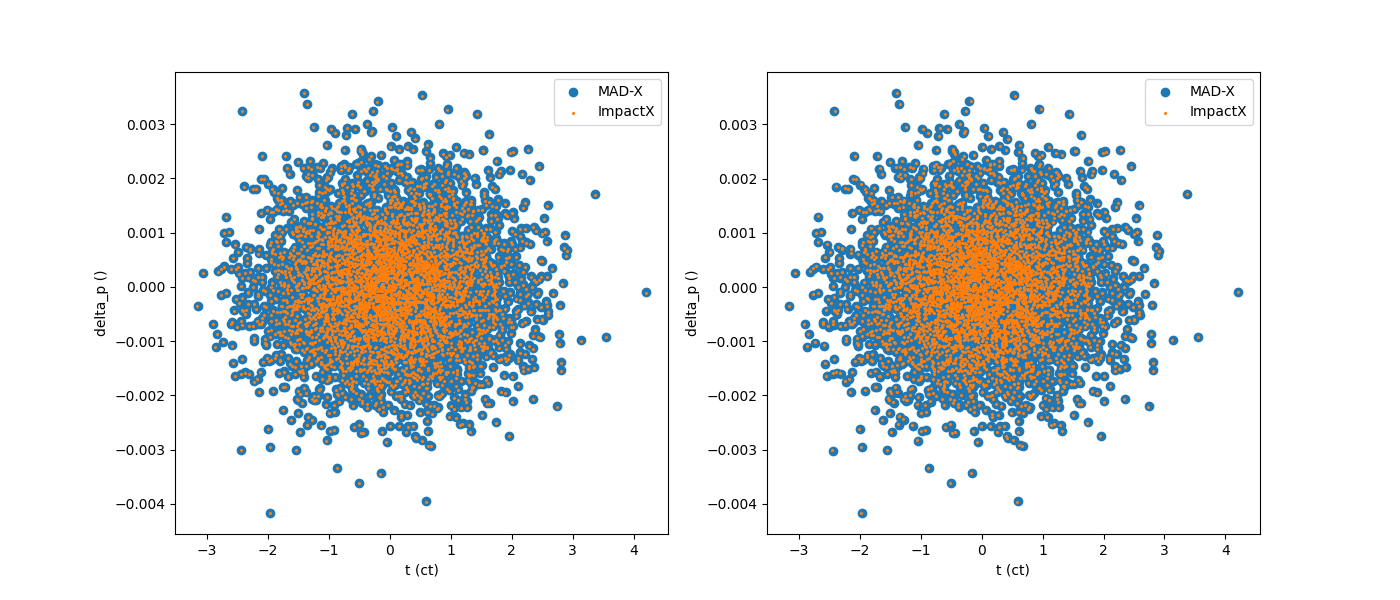

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

ax1.scatter(madx_particles['t'][5000:], madx_particles['pt'][5000:], label='MAD-X')
ax1.scatter(-1*(elegant_particles['t'] - np.average(elegant_particles['t'])) * constants.c, 
            (elegant_particles['p'] - np.average(elegant_particles['p'])) / np.average(elegant_particles['p']), 
            marker='x', s=2, label='ImpactX')
ax1.set_xlabel('t (ct)')
ax1.set_ylabel('delta_p ()')
ax1.legend()

ax2.scatter(madx_particles['t'][5000:], madx_particles['pt'][5000:], label='MAD-X')
ax2.scatter(-impactx_particles['position_t'], impactx_particles['momentum_t'], marker='x', s=2, label='ImpactX')
ax2.set_xlabel('t (ct)')
ax2.set_ylabel('delta_p ()')
ax2.legend()

plt.show()